# Data Preview:



In [47]:
# Importing the required libraries

!pip install streamlit

import streamlit as st 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import re
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_score

# Hierarchical
import scipy.cluster.hierarchy as sch    
#For dendrogram
from sklearn.cluster import AgglomerativeClustering
# K-Means
from sklearn.cluster import KMeans
# DBSCAN
from sklearn.cluster import DBSCAN


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Reading the dataset

df = pd.read_excel(r"C:\Users\sahil\Desktop\excelr data science\Projects\Clustering (Global Development)\World_development_mesurement.xlsx")

In [3]:
# Displaying head of dataset

df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
df.shape


(2704, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
# Renaming columns for simplicity

df.rename(columns={
    'Birth Rate': 'birth_rate',
    'Business Tax Rate': 'business_tax_rate',
    'CO2 Emissions': 'co2_emissions',
    'Country': 'country',
    'Days to Start Business': 'days_to_start_business',
    'Ease of Business': 'ease_of_business',
    'Energy Usage': 'energy_usage',
    'GDP': 'gdp',
    'Health Exp % GDP': 'health_exp_gdp',
    'Health Exp/Capita': 'health_exp_per_capita',
    'Hours to do Tax': 'hours_to_do_tax',
    'Infant Mortality Rate': 'infant_mortality_rate',
    'Internet Usage': 'internet_usage',
    'Lending Interest': 'lending_interest',
    'Life Expectancy Female': 'life_expectancy_female',
    'Life Expectancy Male': 'life_expectancy_male',
    'Mobile Phone Usage': 'mobile_phone_usage',
    'Number of Records': 'number_of_records',
    'Population 0-14': 'population_0_14',
    'Population 15-64': 'population_15_64',
    'Population 65+': 'population_65_plus',
    'Population Total': 'population_total',
    'Population Urban': 'population_urban',
    'Tourism Inbound': 'tourism_inbound',
    'Tourism Outbound': 'tourism_outbound'
}, inplace=True)

# Verifying the changes
print(df.columns)


Index(['birth_rate', 'business_tax_rate', 'co2_emissions', 'country',
       'days_to_start_business', 'ease_of_business', 'energy_usage', 'gdp',
       'health_exp_gdp', 'health_exp_per_capita', 'hours_to_do_tax',
       'infant_mortality_rate', 'internet_usage', 'lending_interest',
       'life_expectancy_female', 'life_expectancy_male', 'mobile_phone_usage',
       'number_of_records', 'population_0_14', 'population_15_64',
       'population_65_plus', 'population_total', 'population_urban',
       'tourism_inbound', 'tourism_outbound'],
      dtype='object')


In [7]:
# Dropping unnecessary columns

df.drop(columns=['number_of_records'], inplace=True)


In [8]:
# Checking presence of null values

df.isnull().sum()

birth_rate                 119
business_tax_rate         1281
co2_emissions              579
country                      0
days_to_start_business     986
ease_of_business          2519
energy_usage               919
gdp                        210
health_exp_gdp             309
health_exp_per_capita      309
hours_to_do_tax           1288
infant_mortality_rate      260
internet_usage             173
lending_interest           824
life_expectancy_female     136
life_expectancy_male       136
mobile_phone_usage         167
population_0_14            220
population_15_64           220
population_65_plus         220
population_total             0
population_urban            26
tourism_inbound            368
tourism_outbound           471
dtype: int64

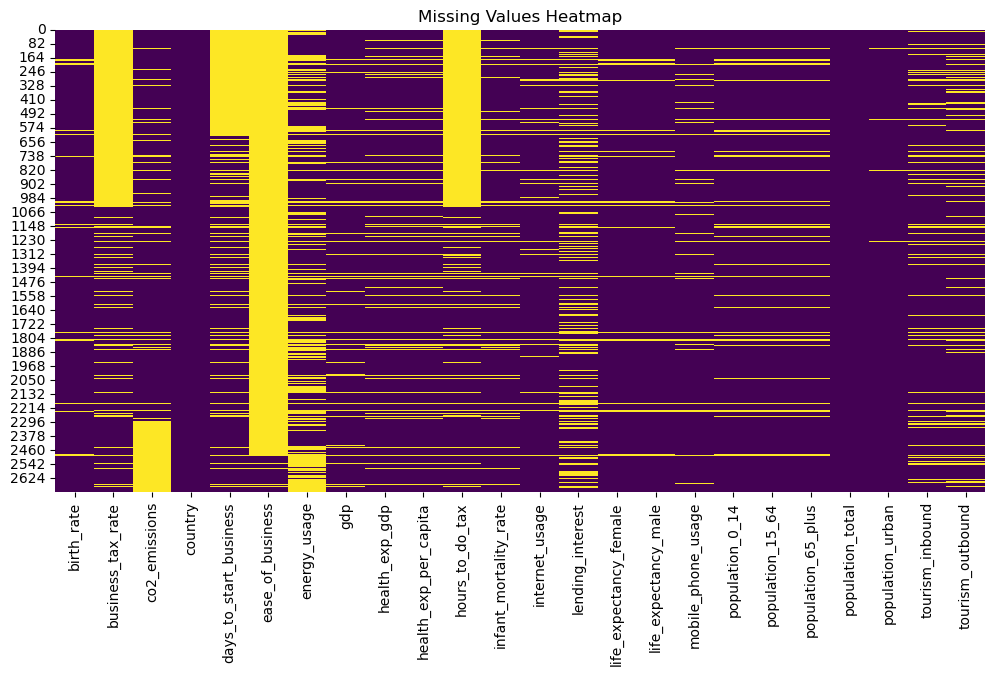

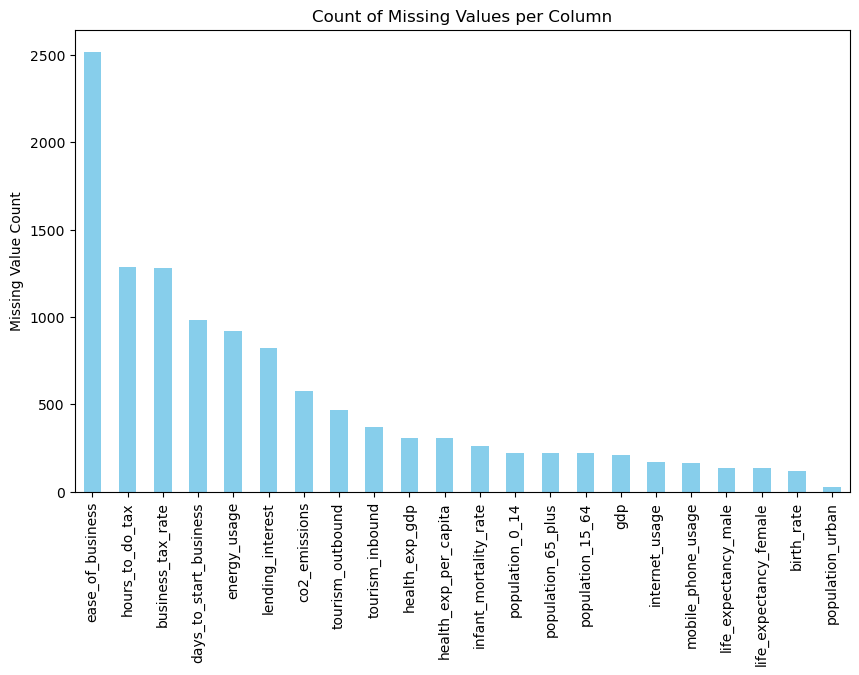

In [9]:
# Heatmap to visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Bar plot of missing values count for each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values per Column')
plt.ylabel('Missing Value Count')
plt.show()


In [10]:
# For columns with more than 50% missing values, droping them
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)


# Dealing with missing values using imputation
# Filling numeric columns with mean:

num_imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Filling categorical columns with mode:

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])





In [11]:
# Here we successfully removed all null values

df.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emissions             0
country                   0
days_to_start_business    0
energy_usage              0
gdp                       0
health_exp_gdp            0
health_exp_per_capita     0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mobile_phone_usage        0
population_0_14           0
population_15_64          0
population_65_plus        0
population_total          0
population_urban          0
tourism_inbound           0
tourism_outbound          0
dtype: int64

In [12]:
for i in df.columns:
    if i != 'country':
        df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x)if isinstance(x,str) and x is not None else x)
        if df[i].dtype != 'o':
             df[i] = pd.to_numeric(df[i], errors = 'coerce')  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2704 non-null   float64
 1   business_tax_rate       2704 non-null   float64
 2   co2_emissions           2704 non-null   float64
 3   country                 2704 non-null   object 
 4   days_to_start_business  2704 non-null   float64
 5   energy_usage            2704 non-null   float64
 6   gdp                     2704 non-null   int64  
 7   health_exp_gdp          2704 non-null   float64
 8   health_exp_per_capita   2704 non-null   int64  
 9   hours_to_do_tax         2704 non-null   float64
 10  infant_mortality_rate   2704 non-null   float64
 11  internet_usage          2704 non-null   float64
 12  lending_interest        2704 non-null   float64
 13  life_expectancy_female  2704 non-null   float64
 14  life_expectancy_male    2704 non-null   

In [14]:
# Now datatypes of features and are in its original state

In [15]:
# Statistical summary

df.describe()

,birth_rate,business_tax_rate,co2_emissions,days_to_start_business,energy_usage,gdp,health_exp_gdp,health_exp_per_capita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
count,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03,2704.000000,2704.000000,2704.000000,2704.000000,...,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03
mean,0.022715,46.661243,1.423071e+05,39.999418,7.723684e+04,2.434402e+11,0.064170,711.531435,302.068503,0.032813,...,71.159268,66.461838,0.578124,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.270644e+09,3.907025e+09
std,0.011086,29.803915,5.459901e+05,45.683314,2.111643e+05,1.087410e+12,0.024774,1409.069825,197.739909,0.028490,...,10.435395,9.150937,0.459751,0.102148,0.066765,0.047482,1.242894e+08,0.244712,1.298344e+10,1.218880e+10
min,0.007000,8.200000,7.000000e+00,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,0.002000,...,39.000000,37.000000,0.000000,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,40.400000,2.237000e+03,20.000000,7.851750e+03,2.025005e+09,0.048000,28.000000,229.500000,0.010000,...,65.000000,61.000000,0.200000,0.210000,0.565000,0.034000,8.783360e+05,0.357750,5.000000e+07,2.600000e+07
50%,0.021000,44.100000,2.990450e+04,39.999418,4.485050e+04,1.201895e+10,0.064000,144.000000,302.068503,0.025000,...,74.000000,68.000000,0.578124,0.303051,0.631000,0.059000,5.800324e+06,0.562953,4.440000e+08,2.605000e+08
75%,0.030000,44.100000,1.423071e+05,39.999418,7.723684e+04,9.101825e+10,0.076000,551.250000,302.068503,0.049000,...,79.000000,73.000000,0.900000,0.395000,0.673000,0.105000,2.014089e+07,0.763000,2.648000e+09,1.711500e+09
max,0.053000,339.100000,8.286892e+06,694.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,0.141000,...,87.000000,88.000000,2.900000,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


# Data Visualization:

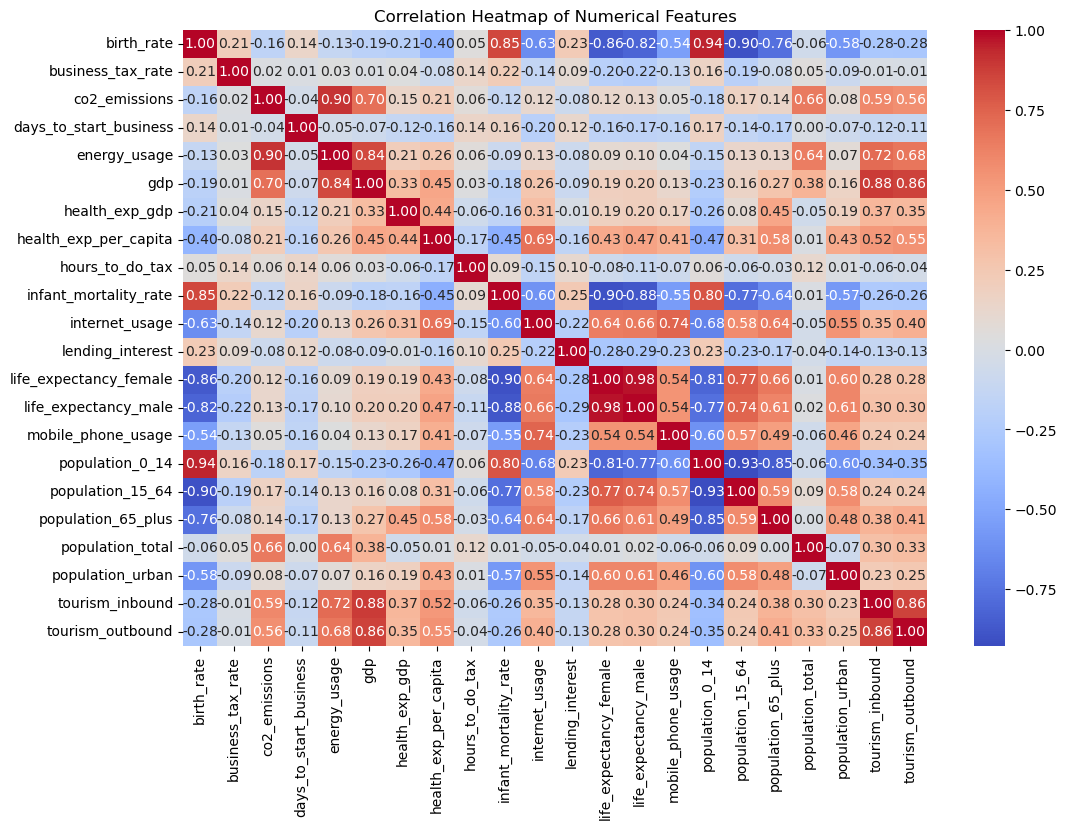

In [16]:
# Correlation heatmap:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


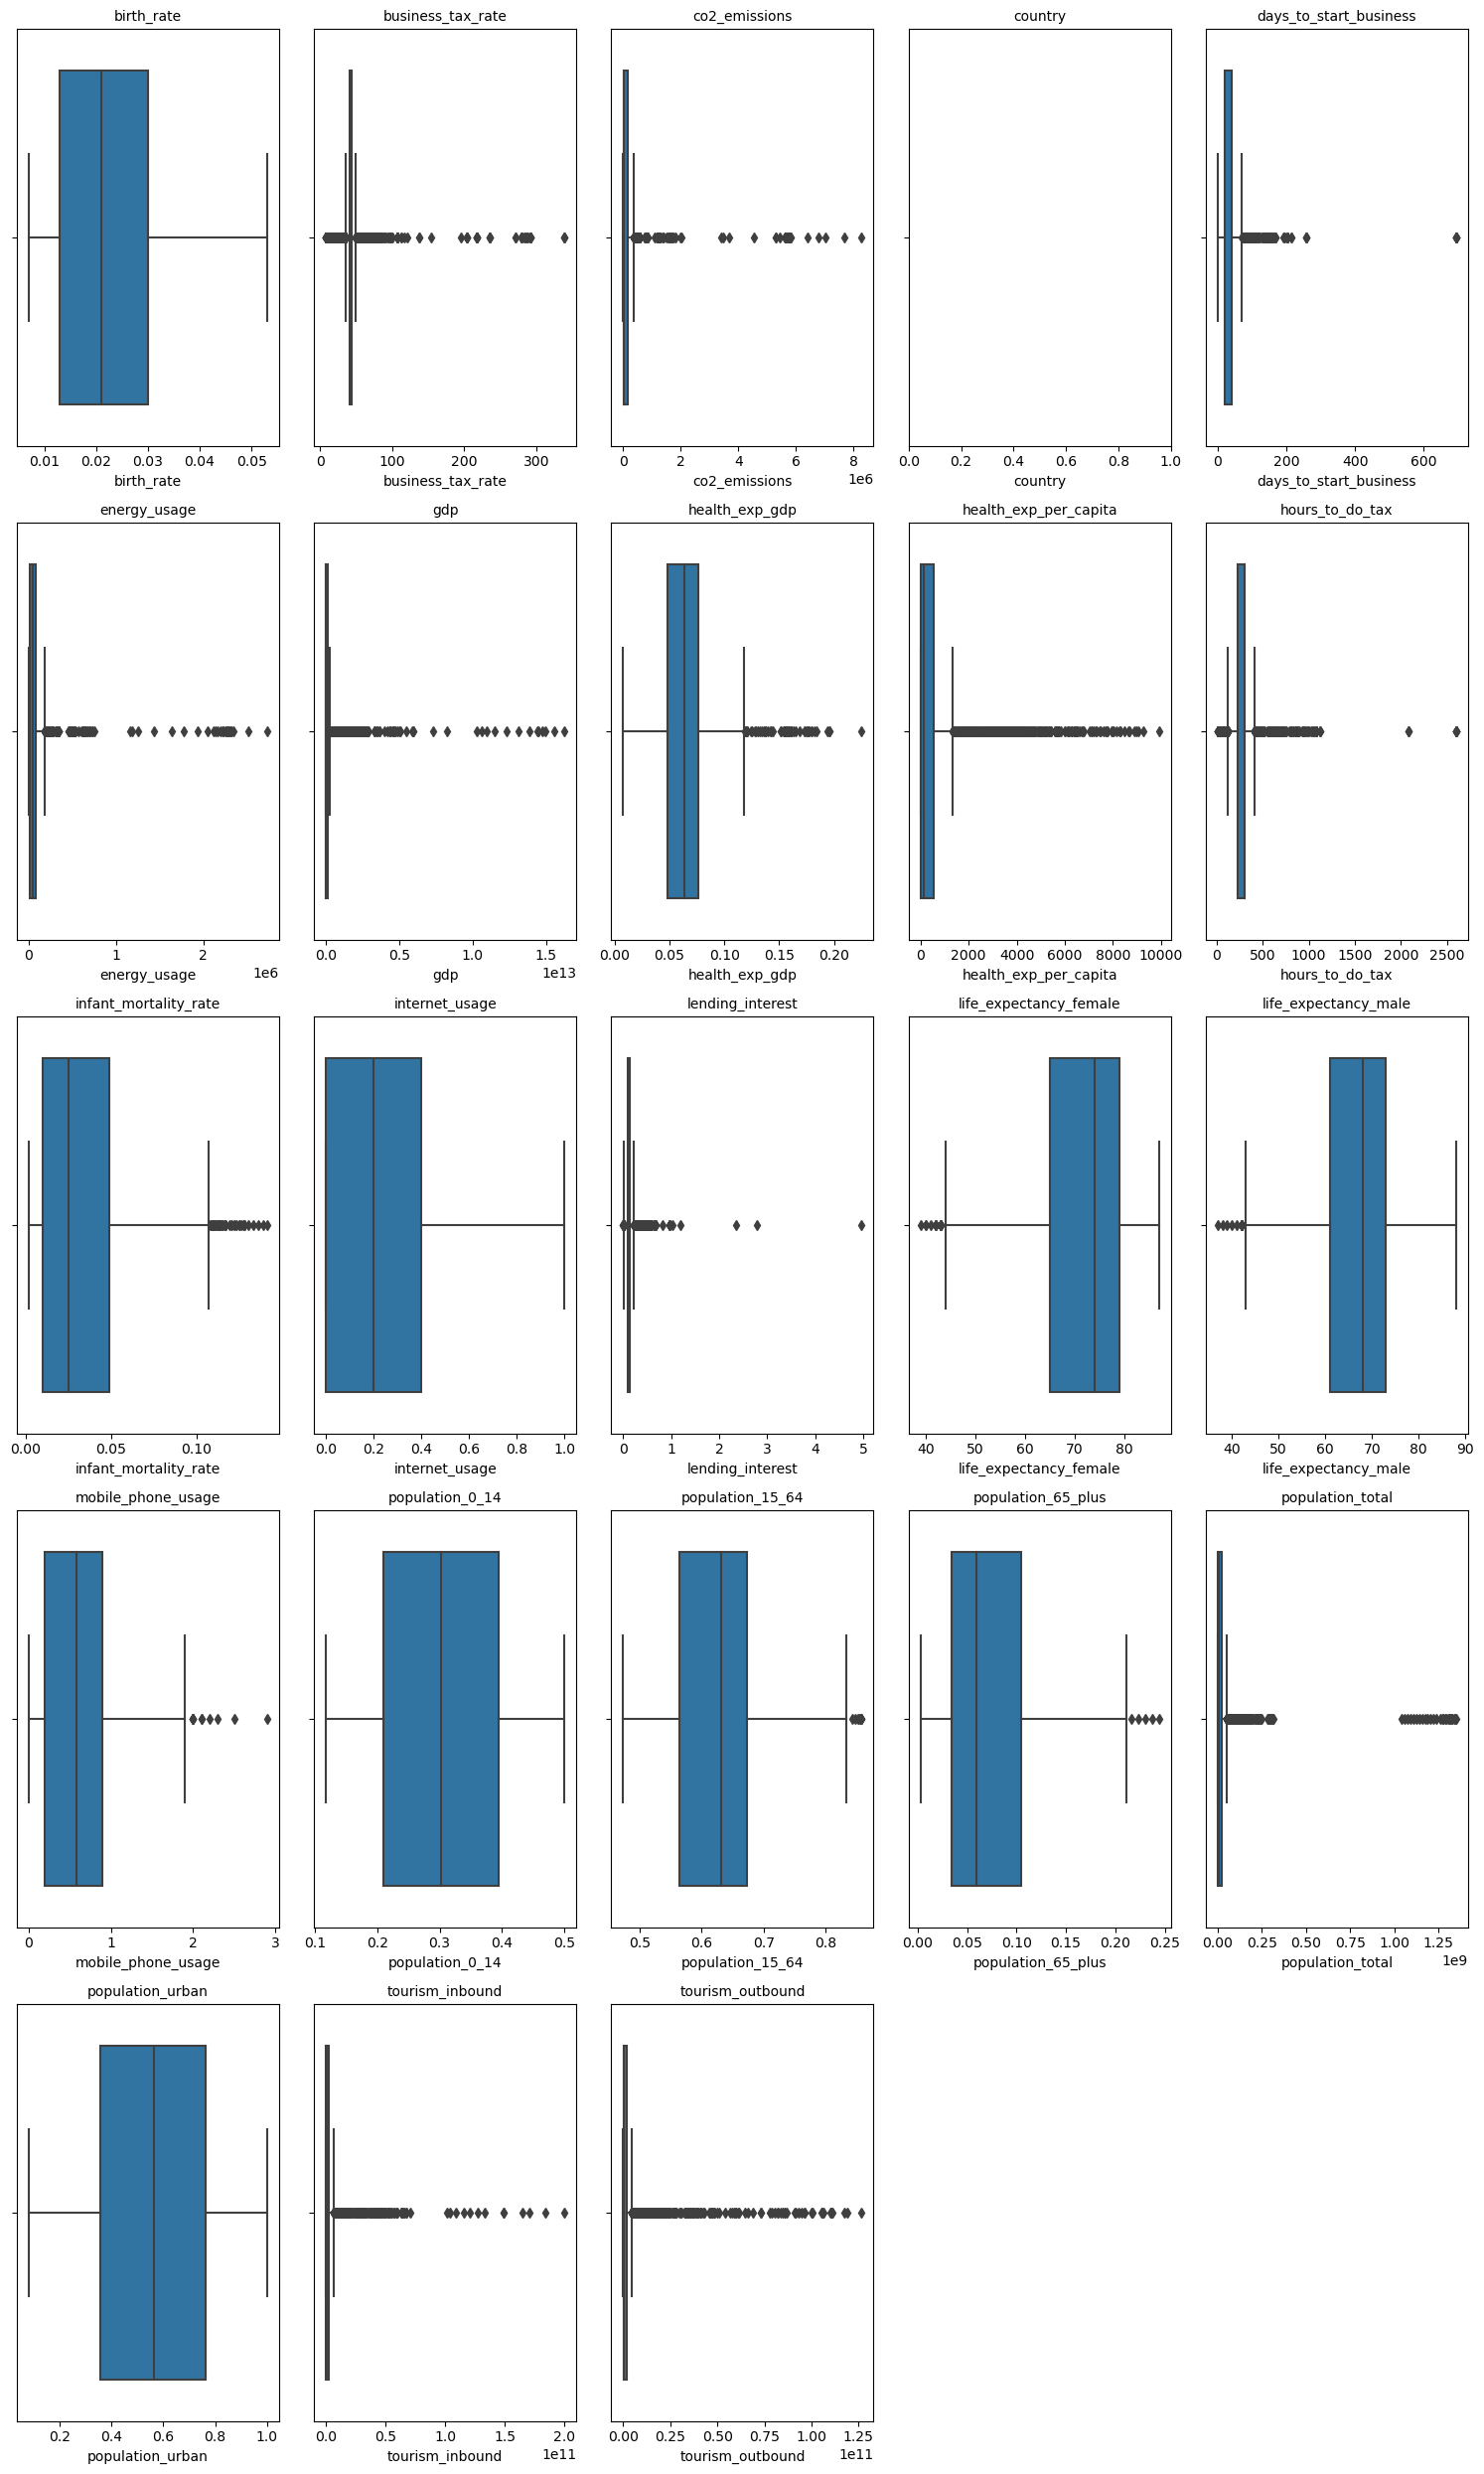

In [17]:
# Box plots for numerical features (to detect outliers)


# Convert all columns to numeric where possible

df1 = df.apply(pd.to_numeric, errors='coerce') 


# Calculate rows and columns dynamically
num_cols = len(df1.columns)
n_cols = 5  # Number of plots per row
n_rows = math.ceil(num_cols / n_cols)  # Calculate required rows dynamically

# Adjust figure size for better visibility
plt.figure(figsize=(15, 5 * n_rows))  # Dynamic height

for i, col in enumerate(df.columns, 1):  # Loop through all columns
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df1[col])
    plt.title(col, fontsize=10)
    
plt.tight_layout()
plt.show()

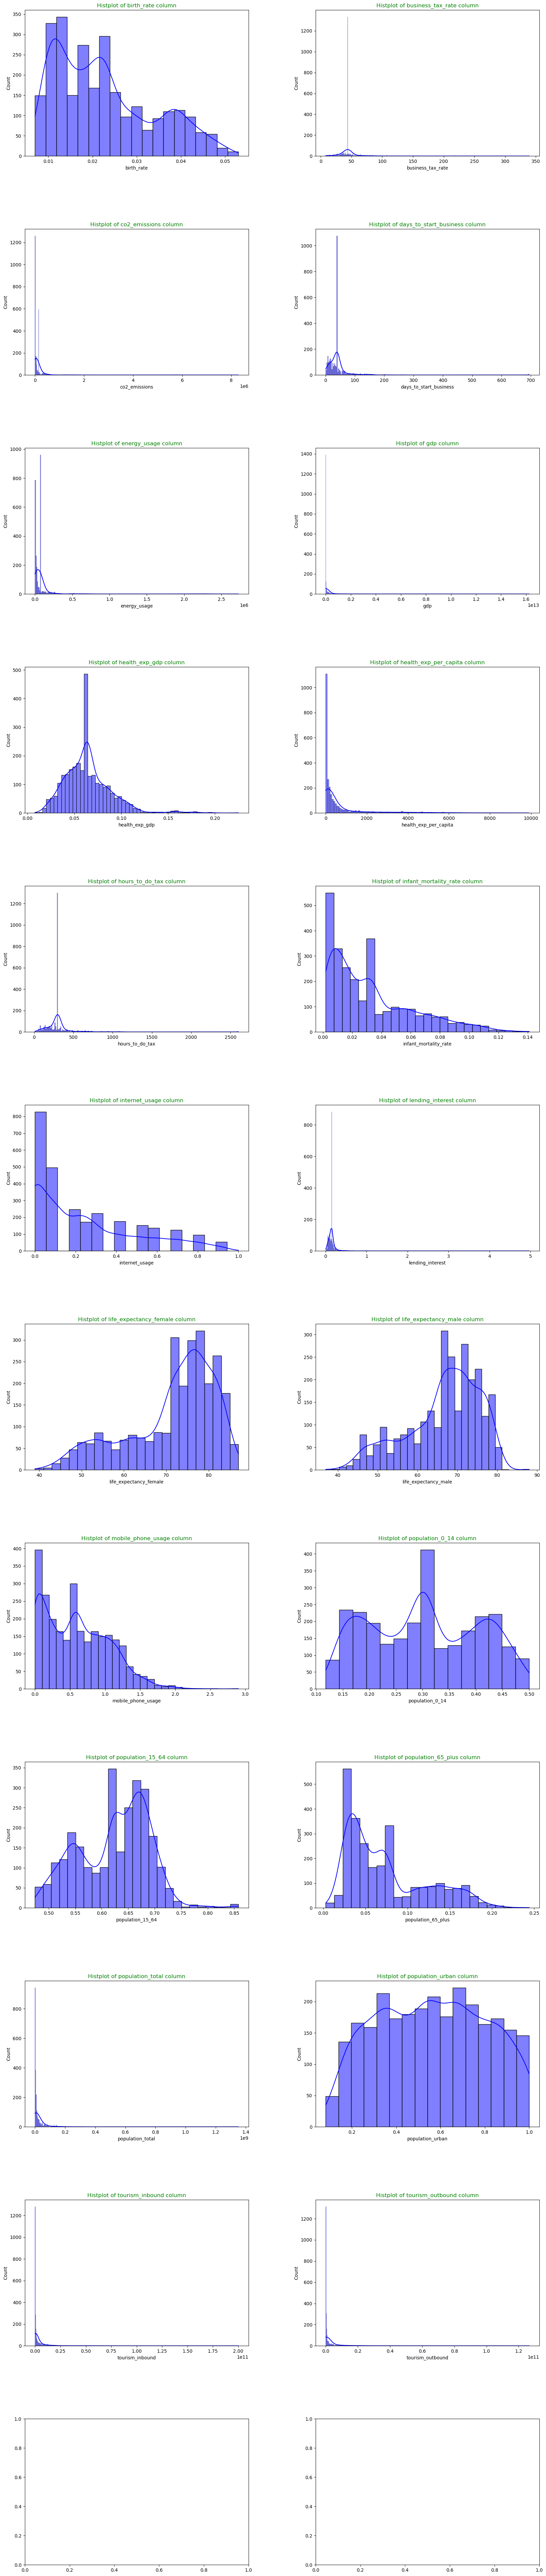

In [18]:
# Plotting histograms

fig, axs = plt.subplots(12,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in df.columns:
    if i != 'country':
        x=counter//2
        y=counter%2
        sns.histplot(df[i],kde=True,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
#fig.savefig('hist.jpg',dpi=500)
plt.show()

In [19]:
# Bar plots of various features w.r.t country column

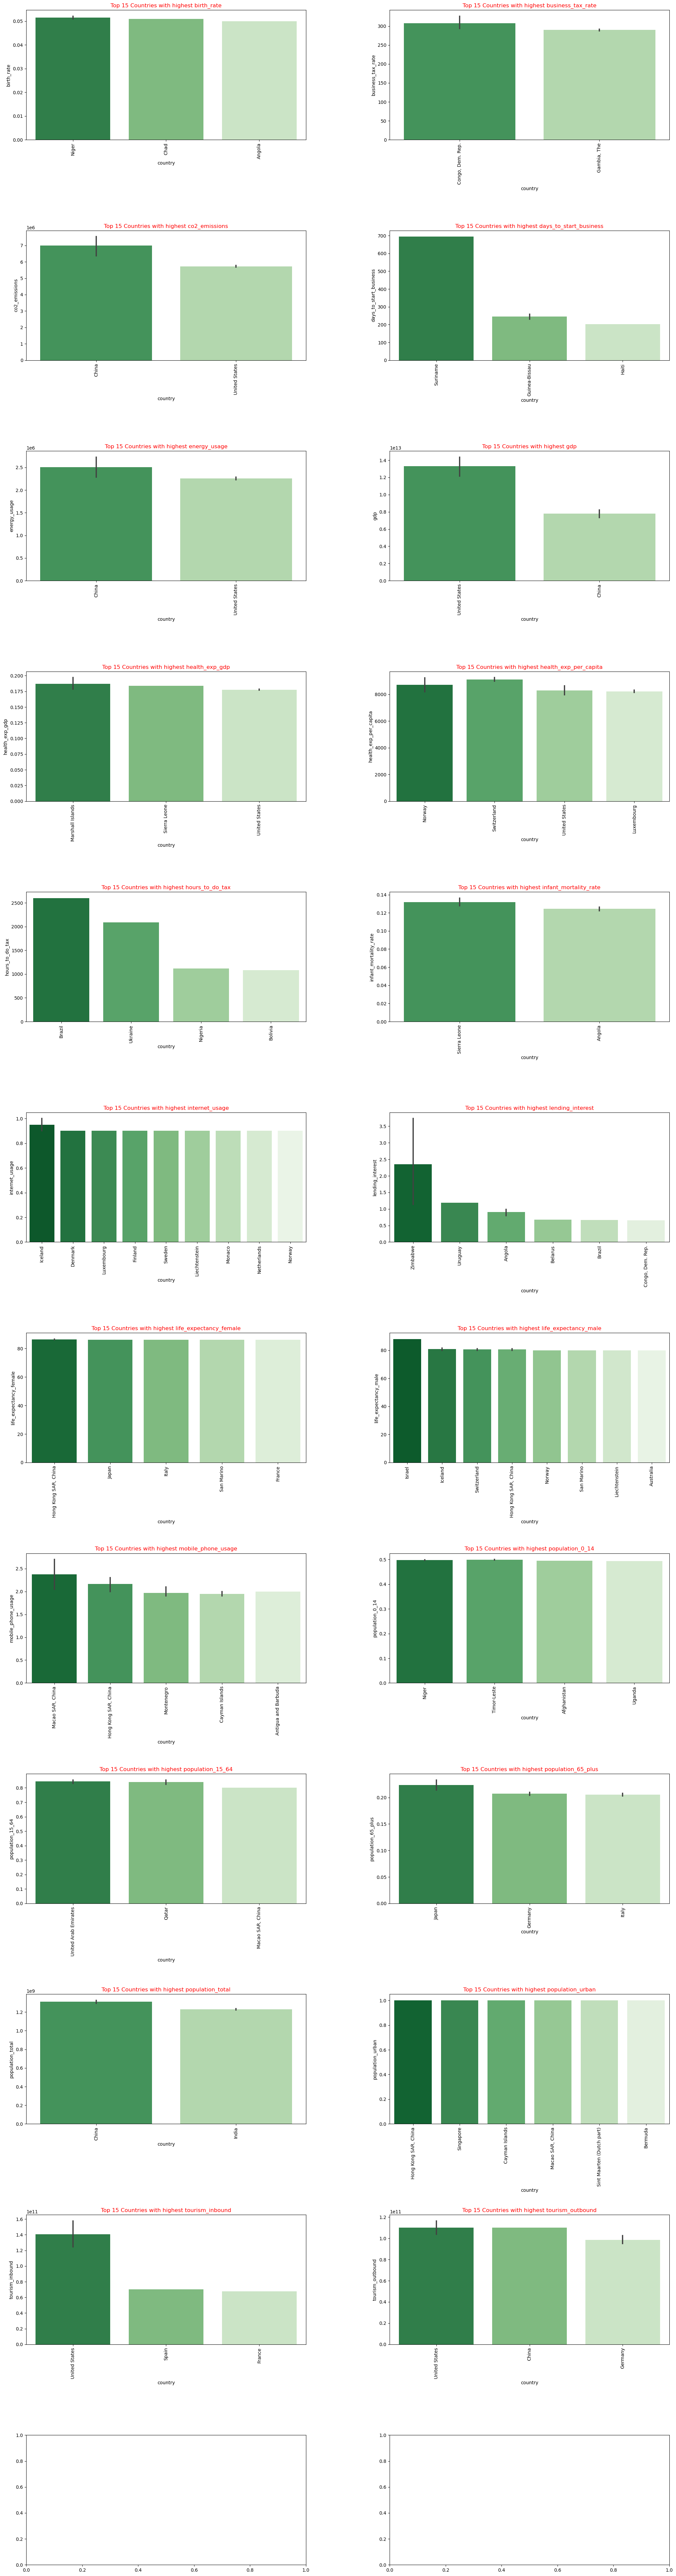

In [20]:
df4 = df.copy()
fig, axs = plt.subplots(12,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'country':
        x=counter//2
        y=counter%2       
        df5 = df4.sort_values(by =i,ascending=False)
        df6 = df5.head(15)
        sns.barplot(x=df6['country'],y=df6[i],palette='Greens_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with highest {}'.format(i),fontdict={'color':'red'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Top15.jpg',dpi=500)
plt.show()


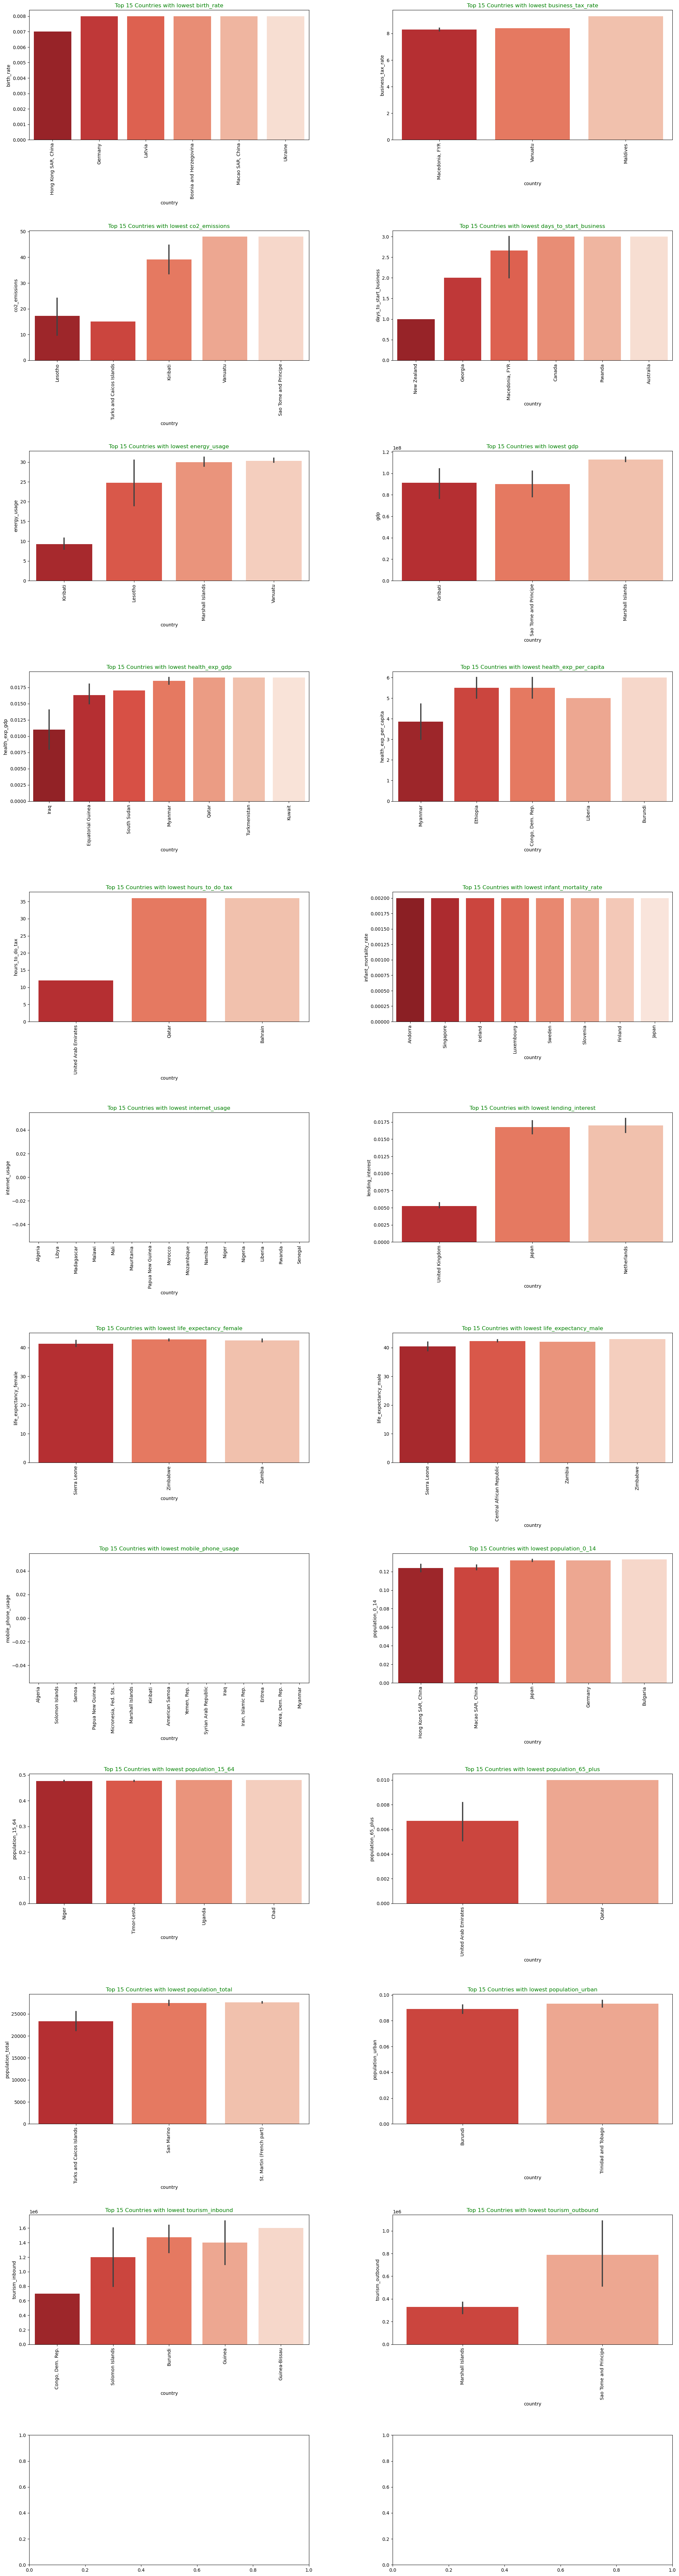

In [21]:
df4 = df.copy()
fig, axs = plt.subplots(12,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'country':
        x=counter//2
        y=counter%2       
        df5 = df4.sort_values(by =i)
        df6 = df5.head(15)
        sns.barplot(x=df6['country'],y=df6[i],palette='Reds_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with lowest {}'.format(i),fontdict={'color':'green'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Least15.jpg',dpi=500)
plt.show()


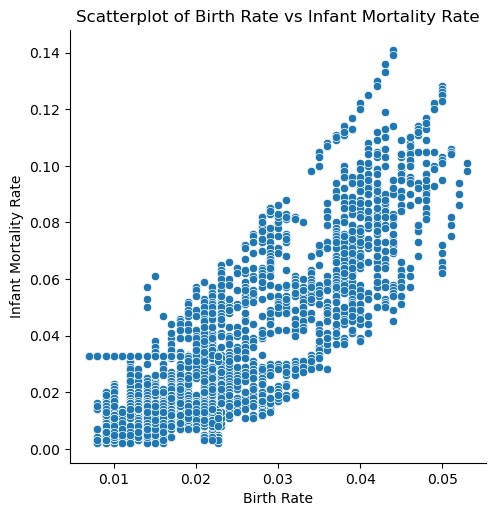

In [22]:
# Creating a scatterplot for 'Birth_Rate' and 'Infant_Mortality_Rate'

sns.pairplot(df, x_vars=['birth_rate'], y_vars=['infant_mortality_rate'],height=5)

plt.xlabel('Birth Rate')
plt.ylabel('Infant Mortality Rate')
plt.title('Scatterplot of Birth Rate vs Infant Mortality Rate')
plt.show()

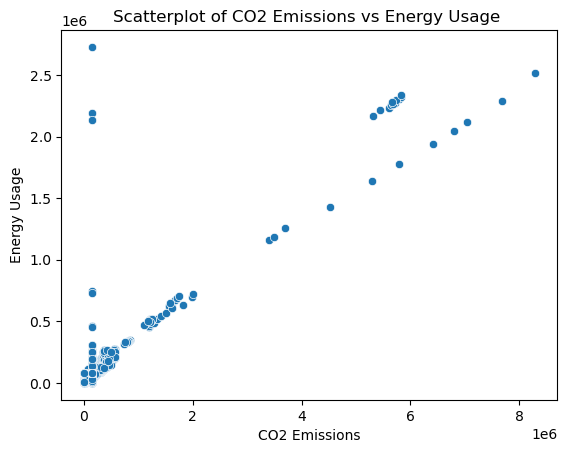

In [23]:
# Creating  a scatterplot for CO2 Emissions and Energy

sns.scatterplot(x='co2_emissions', y='energy_usage',data=df)

plt.xlabel('CO2 Emissions')
plt.ylabel('Energy Usage')
plt.title('Scatterplot of CO2 Emissions vs Energy Usage ')
plt.show()


# Data Preprocessing:

In [24]:
# Handling outliers in our dataset:


In [25]:
for cols in df.columns:
    if cols != 'country':
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[cols] = np.where(df[cols] < lower_bound, lower_bound, df[cols])
        df[cols] = np.where(df[cols] > upper_bound, upper_bound, df[cols])

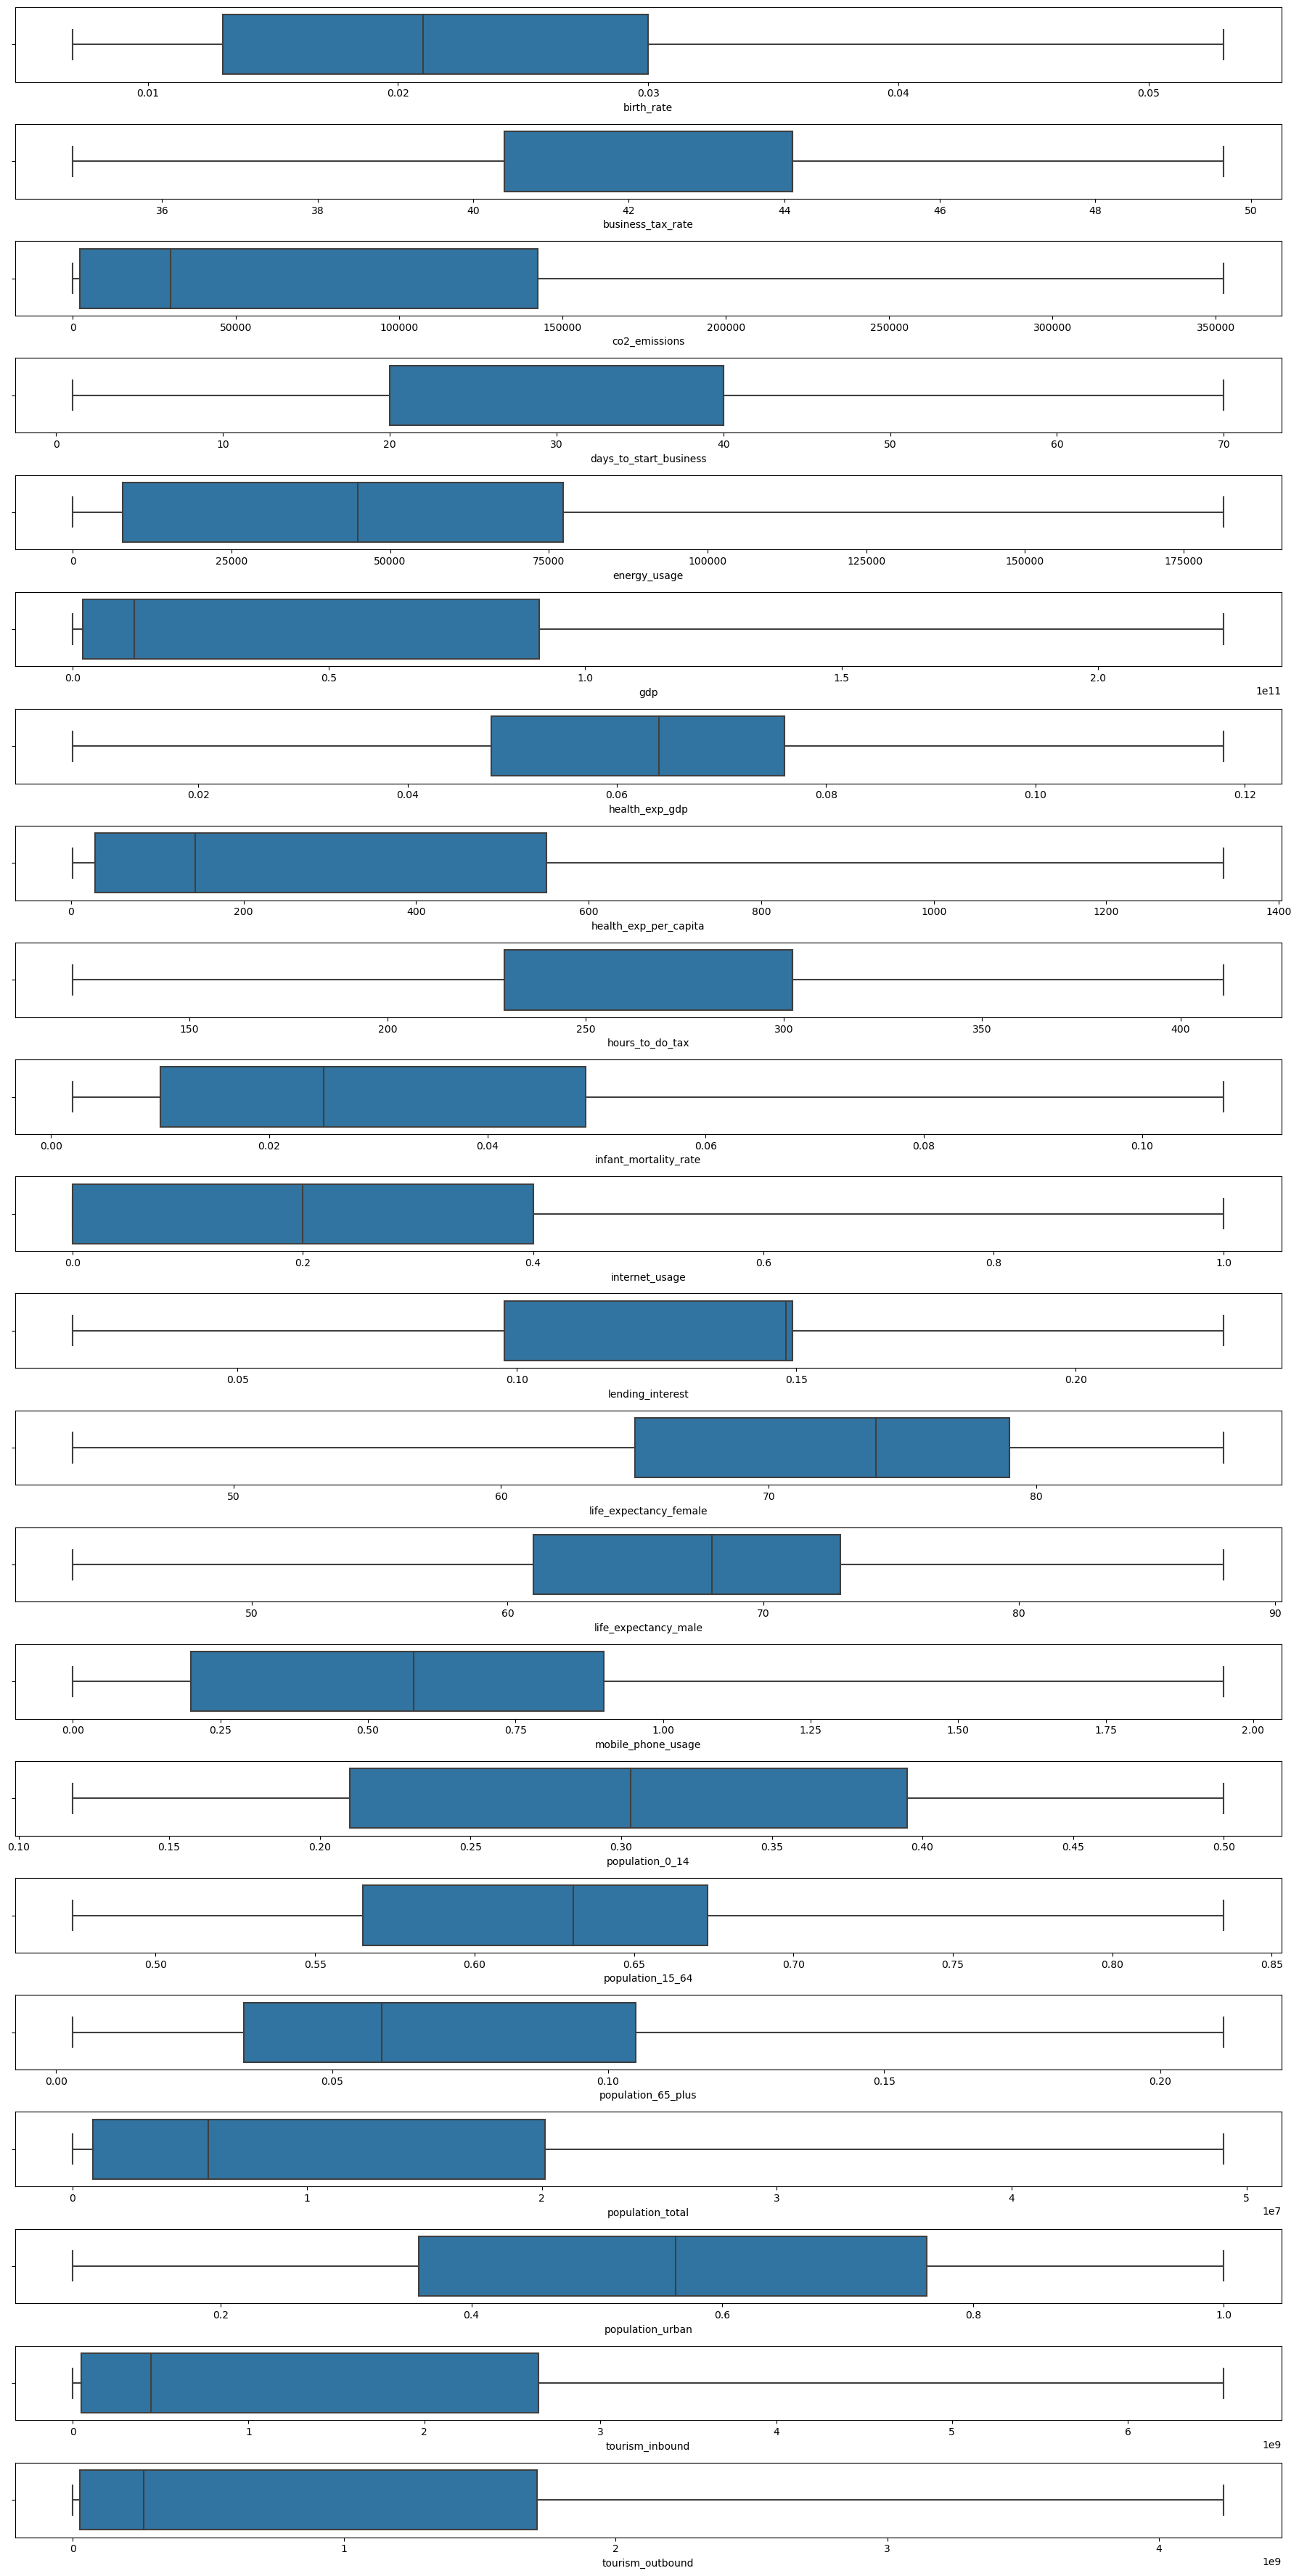

In [26]:
# Plotting Boxplot to check if outliers are removed or not

df_box=df.drop('country', axis=1)
plt.figure(figsize=(18,40))
for i, j in enumerate(df_box.columns):
    plt.subplot(25,1,i+1)
    sns.boxplot(x=df_box[j])
    plt.xlabel(j)
    plt.tight_layout()

In [27]:
# Standardize the Data

df_numerical = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [28]:
# PCA for Dimensionality Reduction
pca = PCA()
data_pca = pca.fit_transform(df_scaled)


In [29]:
# The amount of variance that each PCA explains is
pca.explained_variance_

array([9.96469865e+00, 3.00281361e+00, 1.62321095e+00, 1.24134118e+00,
       8.12727224e-01, 7.82184268e-01, 7.22294884e-01, 6.91436603e-01,
       6.14972774e-01, 5.32220724e-01, 4.27247035e-01, 3.16798256e-01,
       2.89210700e-01, 2.45193240e-01, 2.20025091e-01, 1.79421921e-01,
       1.24924363e-01, 1.00853283e-01, 5.30858760e-02, 4.87316128e-02,
       1.46280746e-02, 1.18787890e-04])

In [30]:
# Cumulative variance

var = pca.explained_variance_ratio_

var = np.cumsum(np.round(var,decimals=4)*100)
var

array([45.28, 58.92, 66.3 , 71.94, 75.63, 79.18, 82.46, 85.6 , 88.39,
       90.81, 92.75, 94.19, 95.5 , 96.61, 97.61, 98.43, 99.  , 99.46,
       99.7 , 99.92, 99.99, 99.99])

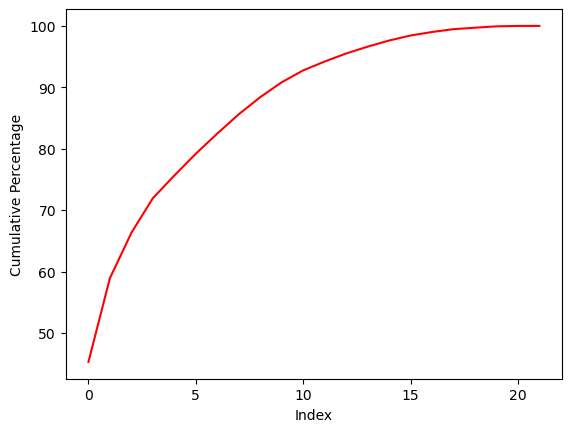

In [31]:
# Variance plot for PCA components obtained
plt.plot(var,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [32]:
pc_components = pca.components_  # This gives you the principal components
df_pca = pc_components[:,:15]  # Select the first 15 principal components


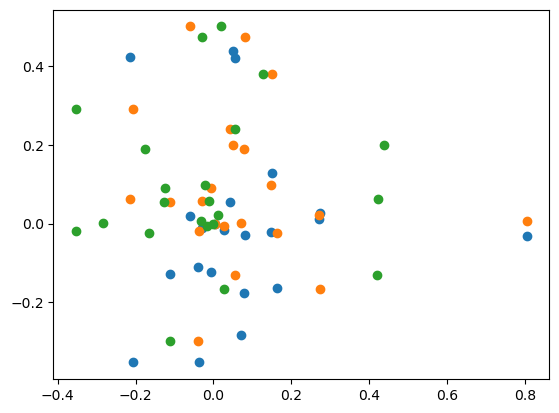

In [33]:
# Plot between PCA's

x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()


# Model Building: 

# K-Means Clustering

Using the elbow method to find the optimal number of clusters

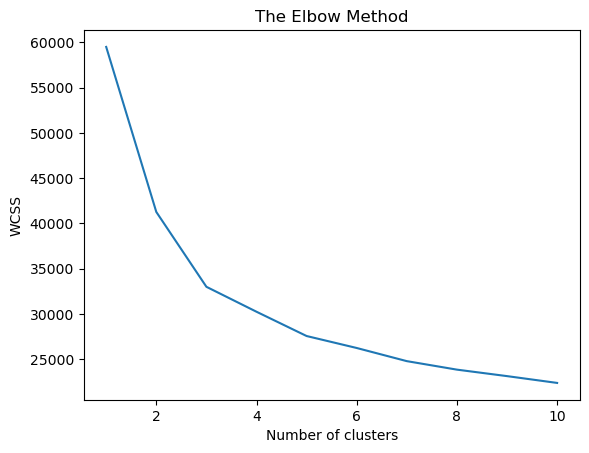

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we can see share drop after 3, so select 3 clusters

In [35]:
# Creating clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

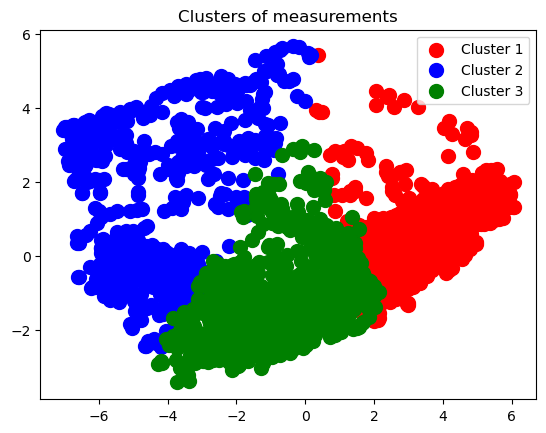

In [36]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

# Hierarchical Clustring

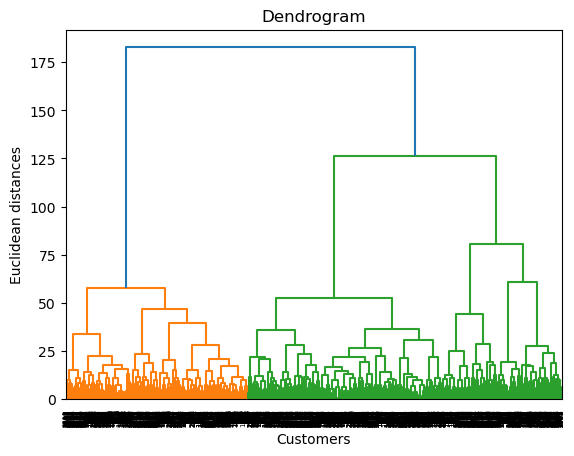

In [37]:
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(data_pca)

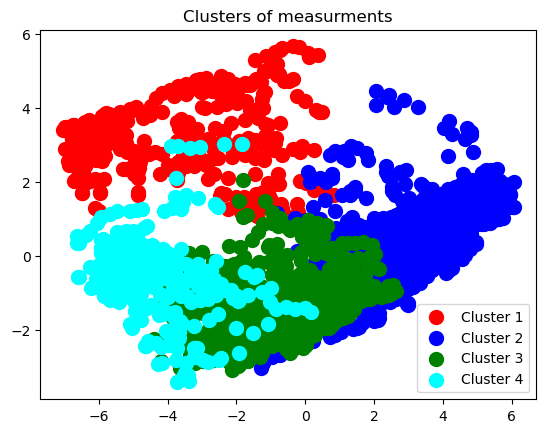

In [39]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

# DBSCAN

In [40]:
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

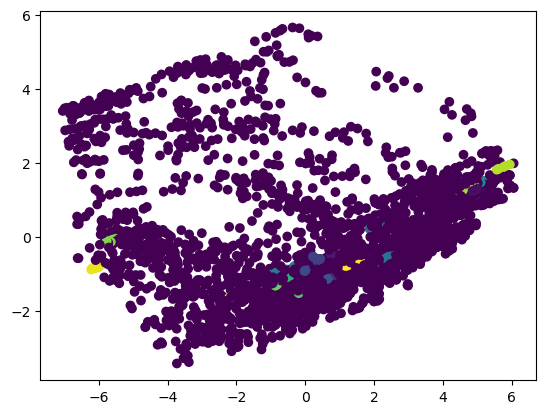

In [41]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [42]:
df['cluster']=dbscan.labels_
df.head()

,birth_rate,business_tax_rate,co2_emissions,country,days_to_start_business,energy_usage,gdp,health_exp_gdp,health_exp_per_capita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,cluster
0,0.020,44.1,87931.0,Algeria,39.999418,26998.000000,5.479006e+10,0.035,60.0,302.068503,...,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,-1
1,0.050,44.1,9542.0,Angola,39.999418,7499.000000,9.129595e+09,0.034,22.0,302.068503,...,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,-1
2,0.043,44.1,1617.0,Benin,39.999418,1983.000000,2.359122e+09,0.043,15.0,302.068503,...,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,-1
3,0.027,44.1,4276.0,Botswana,39.999418,1836.000000,5.788312e+09,0.047,152.0,302.068503,...,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,-1
4,0.046,44.1,1041.0,Burkina Faso,39.999418,77236.840896,2.610959e+09,0.051,12.0,302.068503,...,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,15


# Model Evaluation:

In [45]:
# K-Means Clustering
optimal_k = 4  # Example, set based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_pca)

# Silhouette Score for Hierarchical
silhouette_hierarchical = silhouette_score(data_pca, hierarchical_labels)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Silhouette Score for DBSCAN
try:
    silhouette_dbscan = silhouette_score(data_pca, dbscan_labels)
except ValueError:
    silhouette_dbscan = "Silhouette score could not be calculated for DBSCAN due to noise or single cluster."

# Print Silhouette Scores
print("Silhouette Scores:")
print(f"K-Means: {silhouette_kmeans}")
print(f"Hierarchical: {silhouette_hierarchical}")
print(f"DBSCAN: {silhouette_dbscan}")


Silhouette Scores:
K-Means: 0.17973934359492957
Hierarchical: 0.20997452596580812
DBSCAN: -0.3515661344459672


# Model Deployment:

2024-12-29 17:51:32.301 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.328 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-29 17:51:33.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:51:33.348 Thread 'MainThread': mi

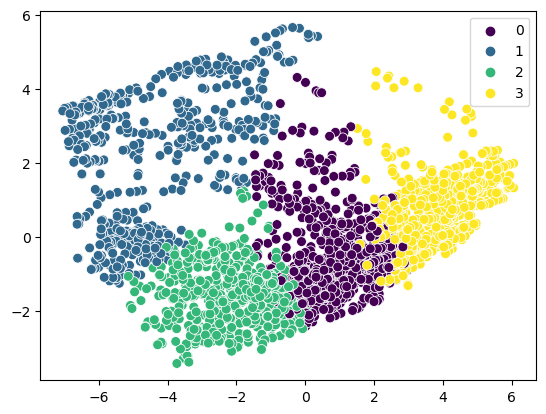

In [48]:
# Streamlit App
def main():
    st.title("Clustering Analysis App")
    st.sidebar.title("Choose Parameters")

    clustering_model = st.sidebar.selectbox(
        "Select Clustering Model", ["K-Means", "Hierarchical", "DBSCAN"]
    )

    if clustering_model == "K-Means":
        num_clusters = st.sidebar.slider("Number of Clusters", 2, 10, 4)
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        labels = kmeans.fit_predict(data_pca)
        silhouette = silhouette_score(data_pca, labels)
        st.write(f"Silhouette Score: {silhouette}")
        st.write("Cluster Centers:", kmeans.cluster_centers_)

    elif clustering_model == "Hierarchical":
        num_clusters = st.sidebar.slider("Number of Clusters", 2, 10, 4)
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
        labels = hierarchical.fit_predict(data_pca)
        silhouette = silhouette_score(data_pca, labels)
        st.write(f"Silhouette Score: {silhouette}")

    elif clustering_model == "DBSCAN":
        eps = st.sidebar.slider("Epsilon (eps)", 0.1, 1.0, 0.5)
        min_samples = st.sidebar.slider("Minimum Samples", 1, 10, 5)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca)
        try:
            silhouette = silhouette_score(data_pca, labels)
            st.write(f"Silhouette Score: {silhouette}")
        except:
            st.write("Silhouette Score could not be calculated.")

    # Plot Clusters
    st.write("Cluster Visualization:")
    fig, ax = plt.subplots()
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=50, ax=ax)
    st.pyplot(fig)

if __name__ == "__main__":
    main()
